<a href="https://www.kaggle.com/code/mohammedmohsen0404/big-mart-sales-prediction?scriptVersionId=188649111" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://www.kaggle.com/code/mohammedmohsen0404/big-mart-sales-prediction?scriptVersionId=188490229" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---
**<center><h1>Big Mart Sales Prediction</h1></center>**
<center><h3>Learning ML, DL through 100 Practical Projects</h3></center>

---

The objective of this project is to utilize machine learning techniques to create an accurate predictive model for forecasting sales of products in the Big Mart retail chain. This problem is a **Regression Machine Learning task**, where the goal is to predict continuous numerical values. Specifically, we aim to predict the sales of various products across different stores based on historical sales data and other relevant features. The developed model will help Big Mart optimize inventory management, stock replenishment strategies and store performance by providing reliable sales forecasts.

# **Import Libraries and Data**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm, skew

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from scipy.stats import boxcox

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
import xgboost as XGB

In [4]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download brijbhushannanda1979/bigmart-sales-data -f  Train.csv

cp: cannot stat '/content/drive/MyDrive/kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data
License(s): CC0-1.0
100%|████████████████████████████████████████| 849k/849k [00:00<00:00, 1.66MB/s]
100%|████████████████████████████████████████| 849k/849k [00:00<00:00, 1.66MB/s]


In [5]:
df = pd.read_csv('Train.csv').copy()

# **Take a look at the data**
---

In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
print(df.shape)

(8523, 12)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
df.select_dtypes(include='object').describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


# **Exploratory Data Analysis**
---

**Univariate Analysis**

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

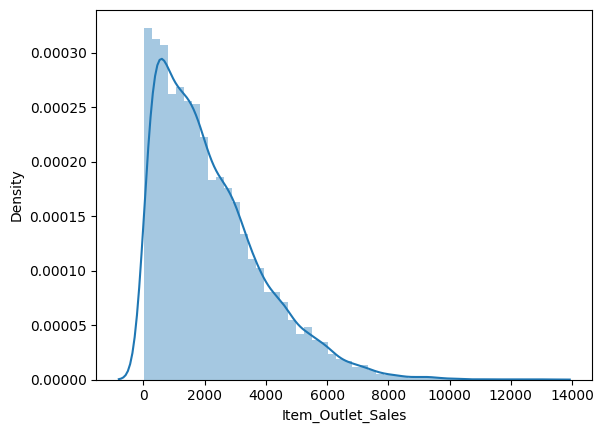

In [11]:
sns.distplot(df['Item_Outlet_Sales'])

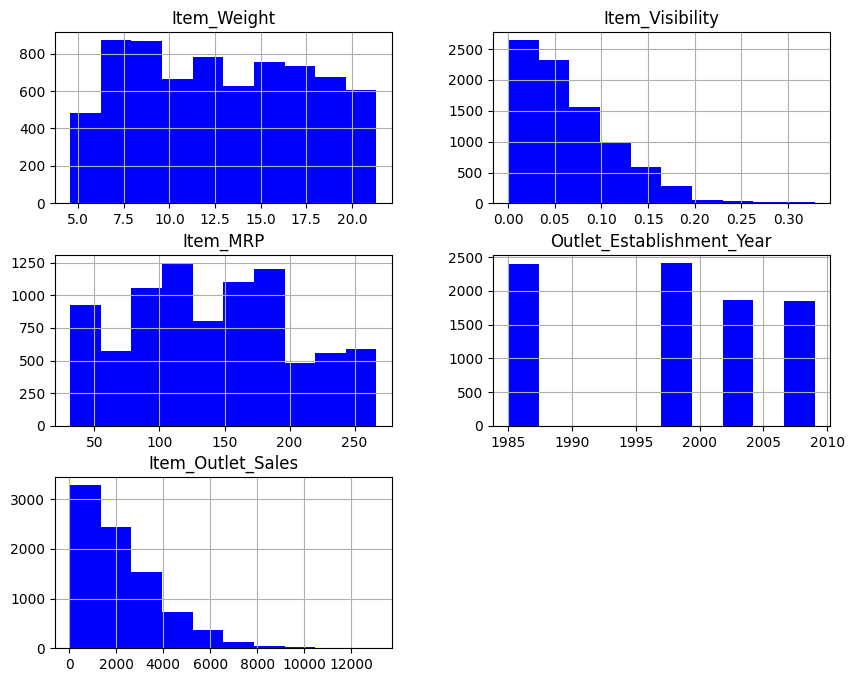

In [12]:
numerical_data=df.select_dtypes(exclude='object')
cat_data=df.select_dtypes(include='object')
numerical_data.hist(figsize=(10,8),color = 'b')
plt.show()

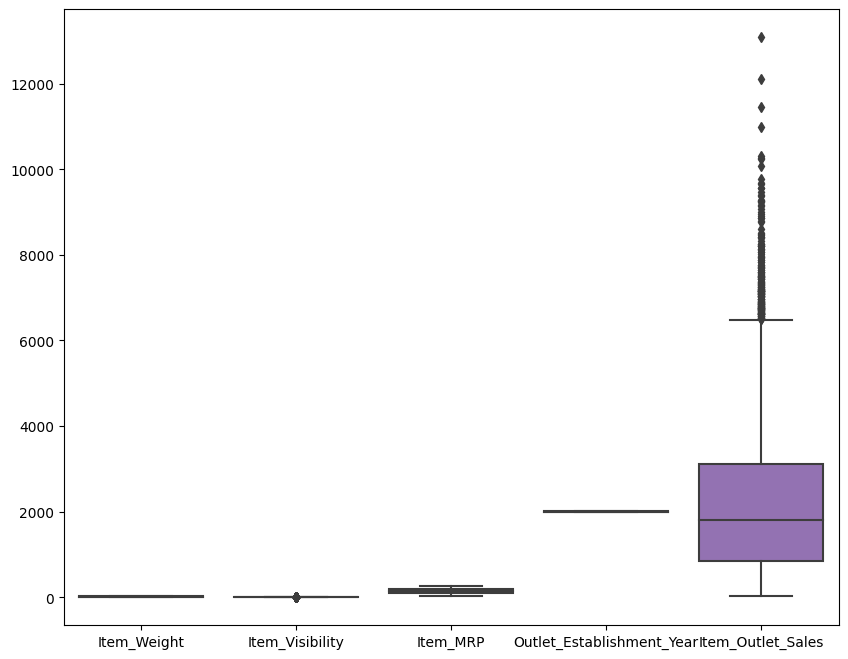

In [13]:
plt.figure(figsize=(10,8))
sns.boxplot(numerical_data)
plt.show()

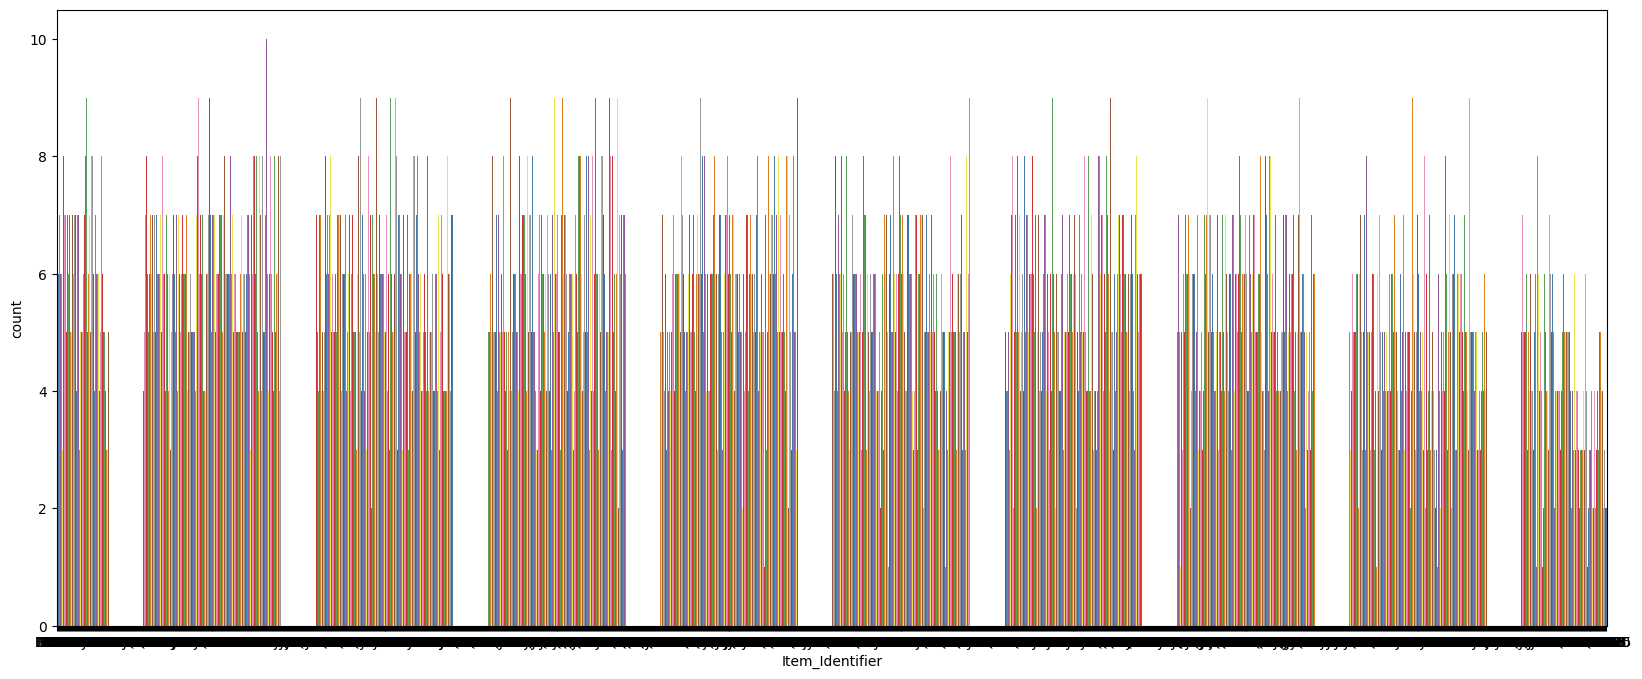

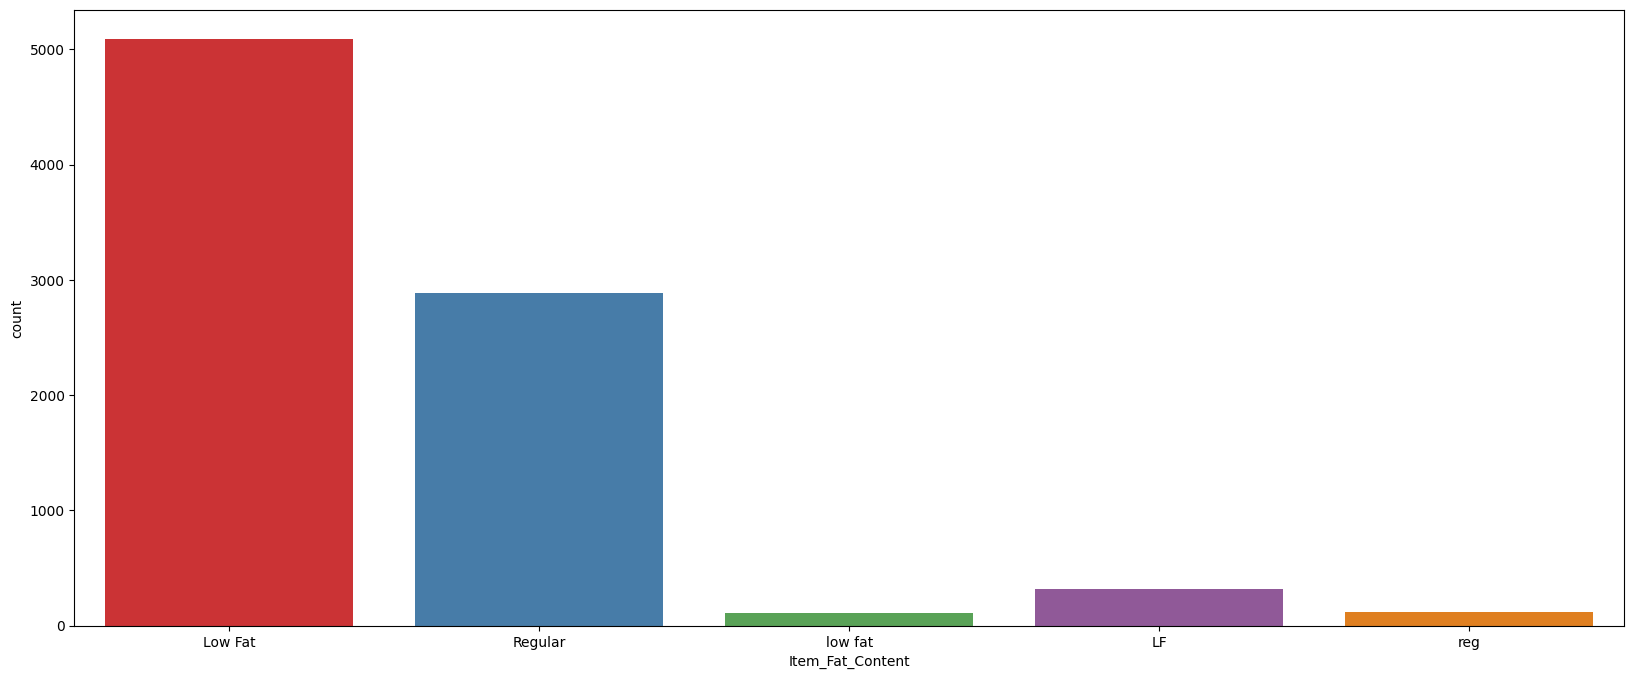

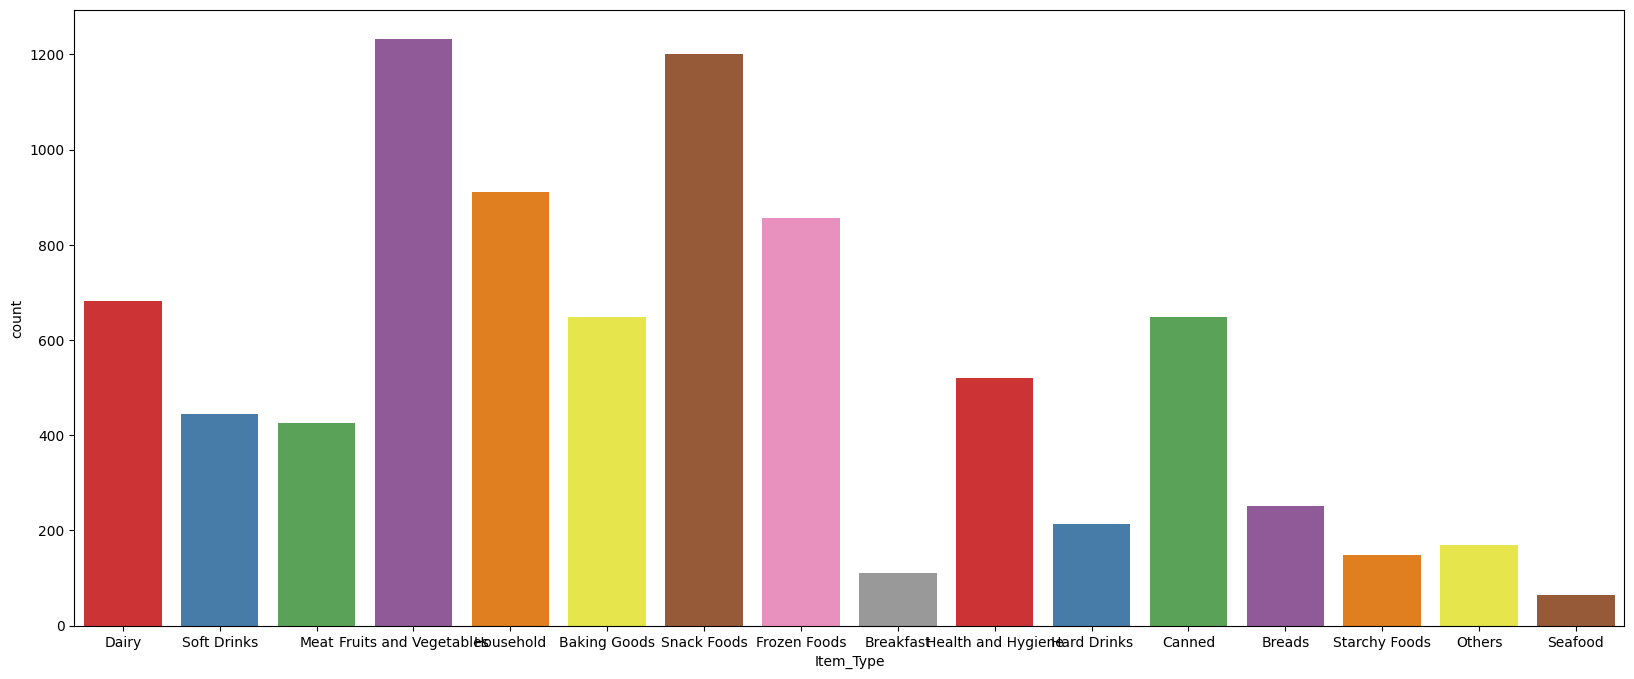

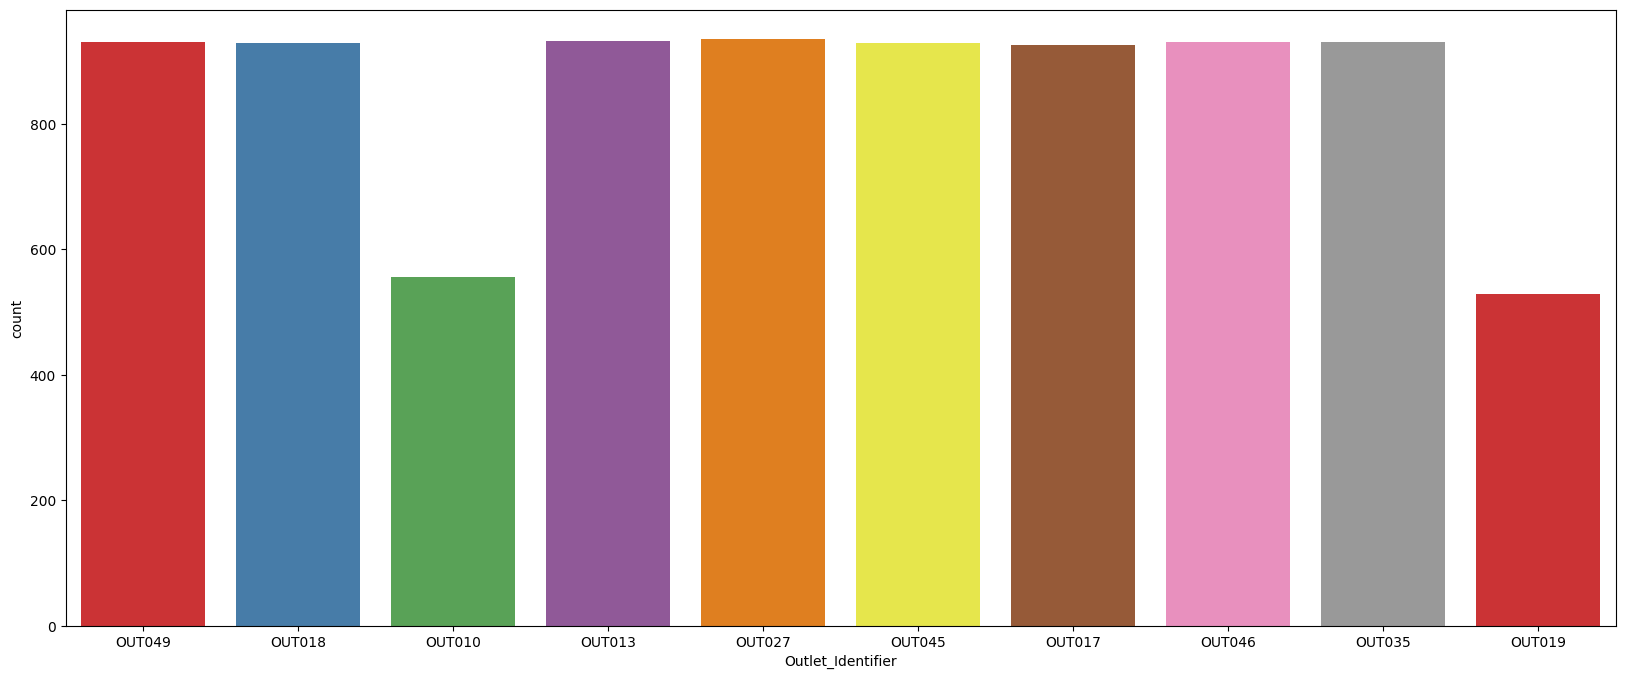

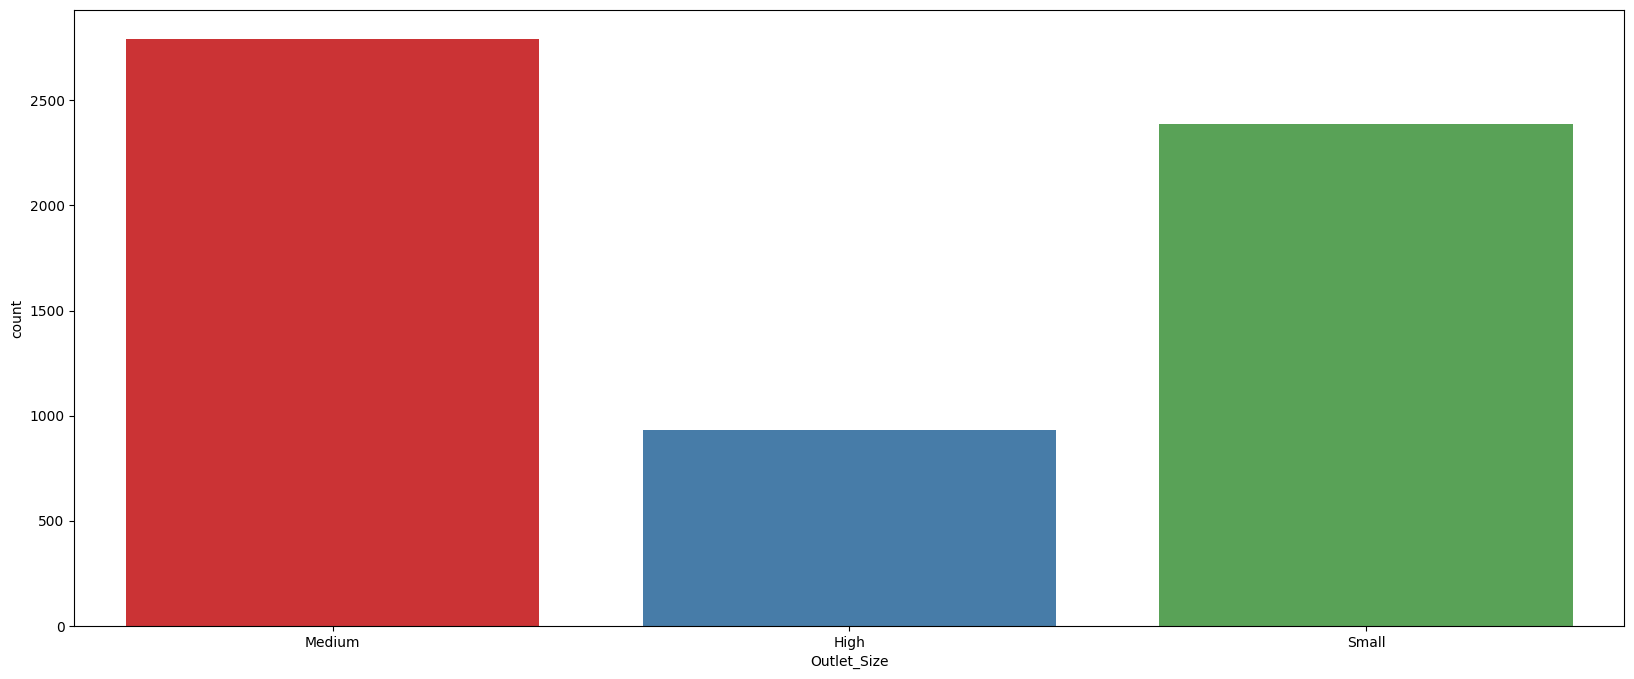

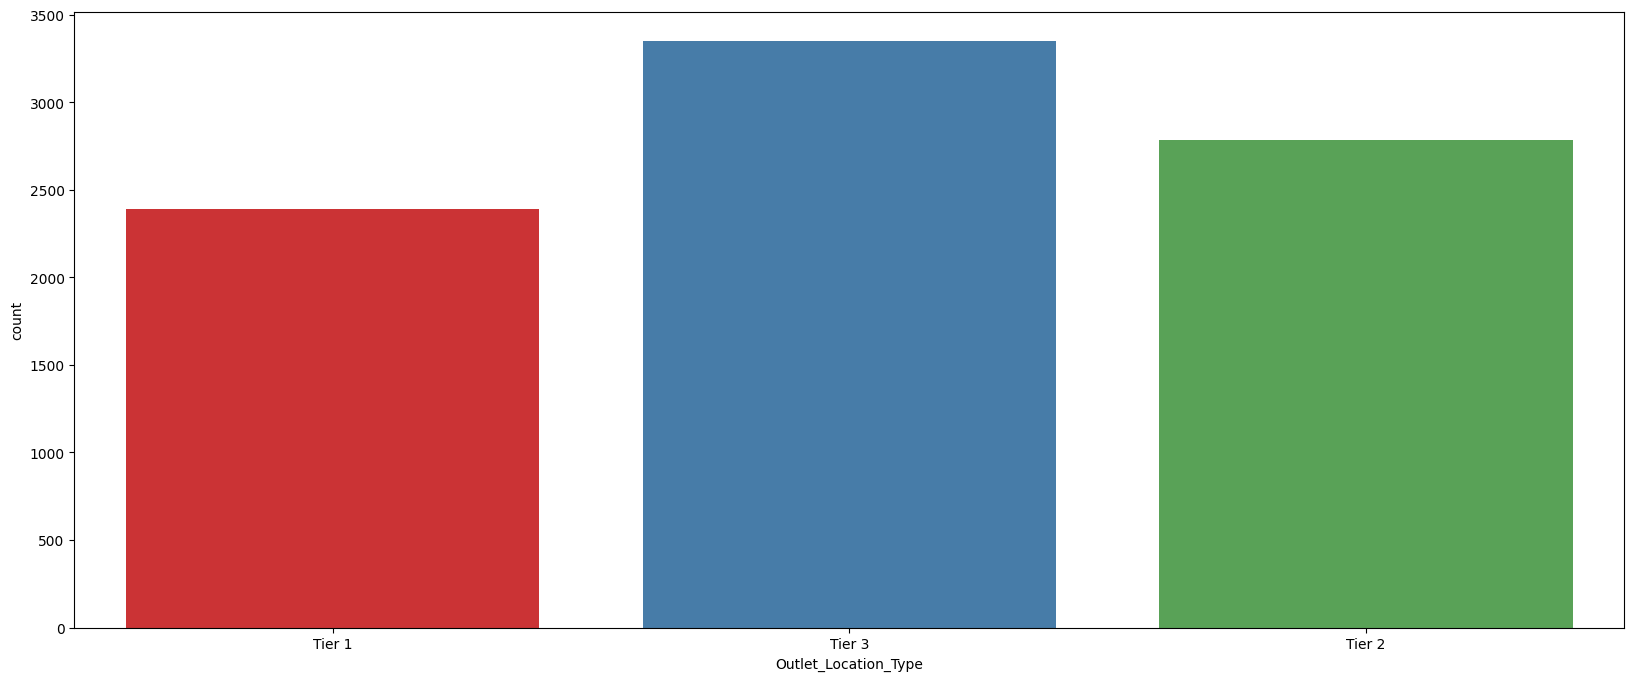

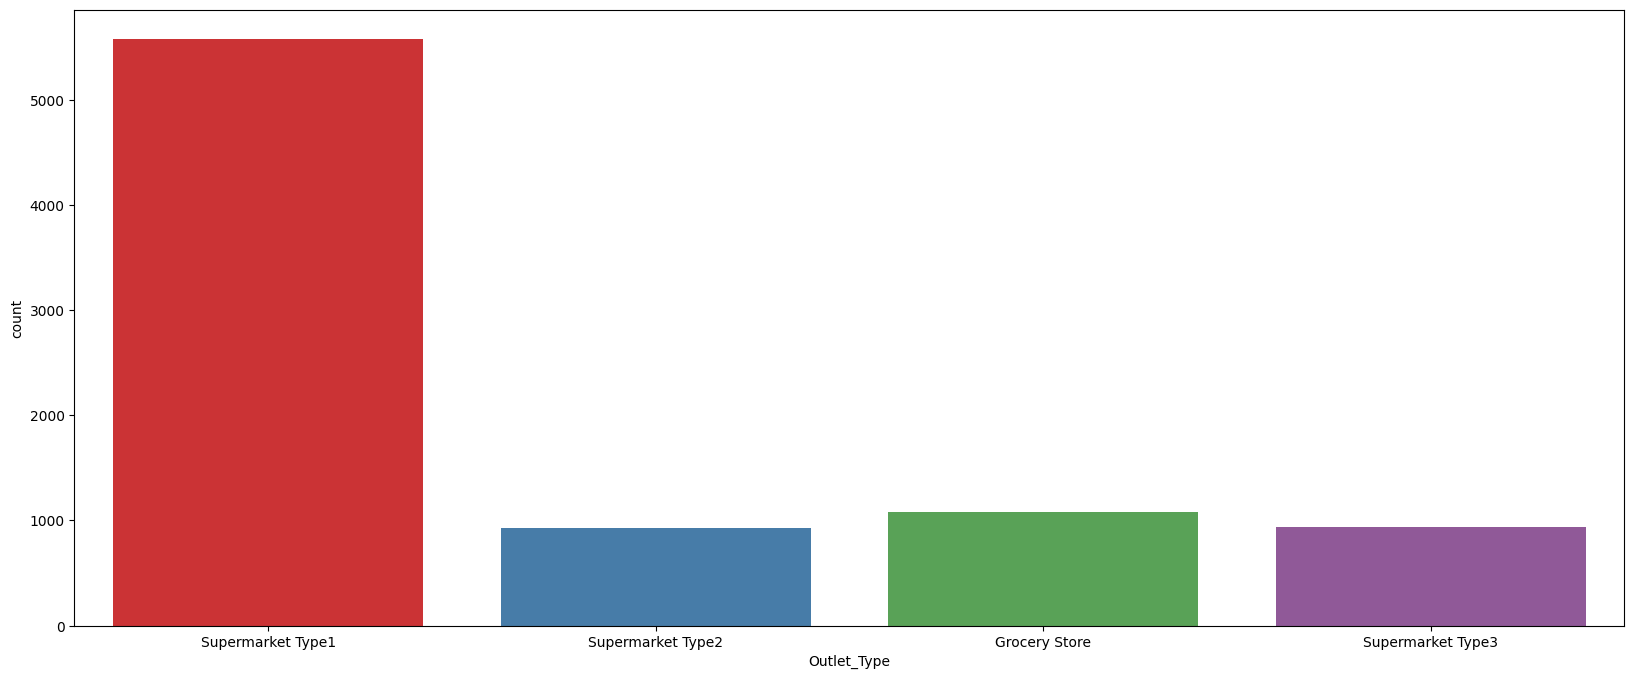

In [14]:
for c in cat_data:
  plt.figure(figsize=(20,8))
  sns.countplot(data=cat_data,x=c,palette='Set1')
  plt.show()

**Multivariate Analysis**

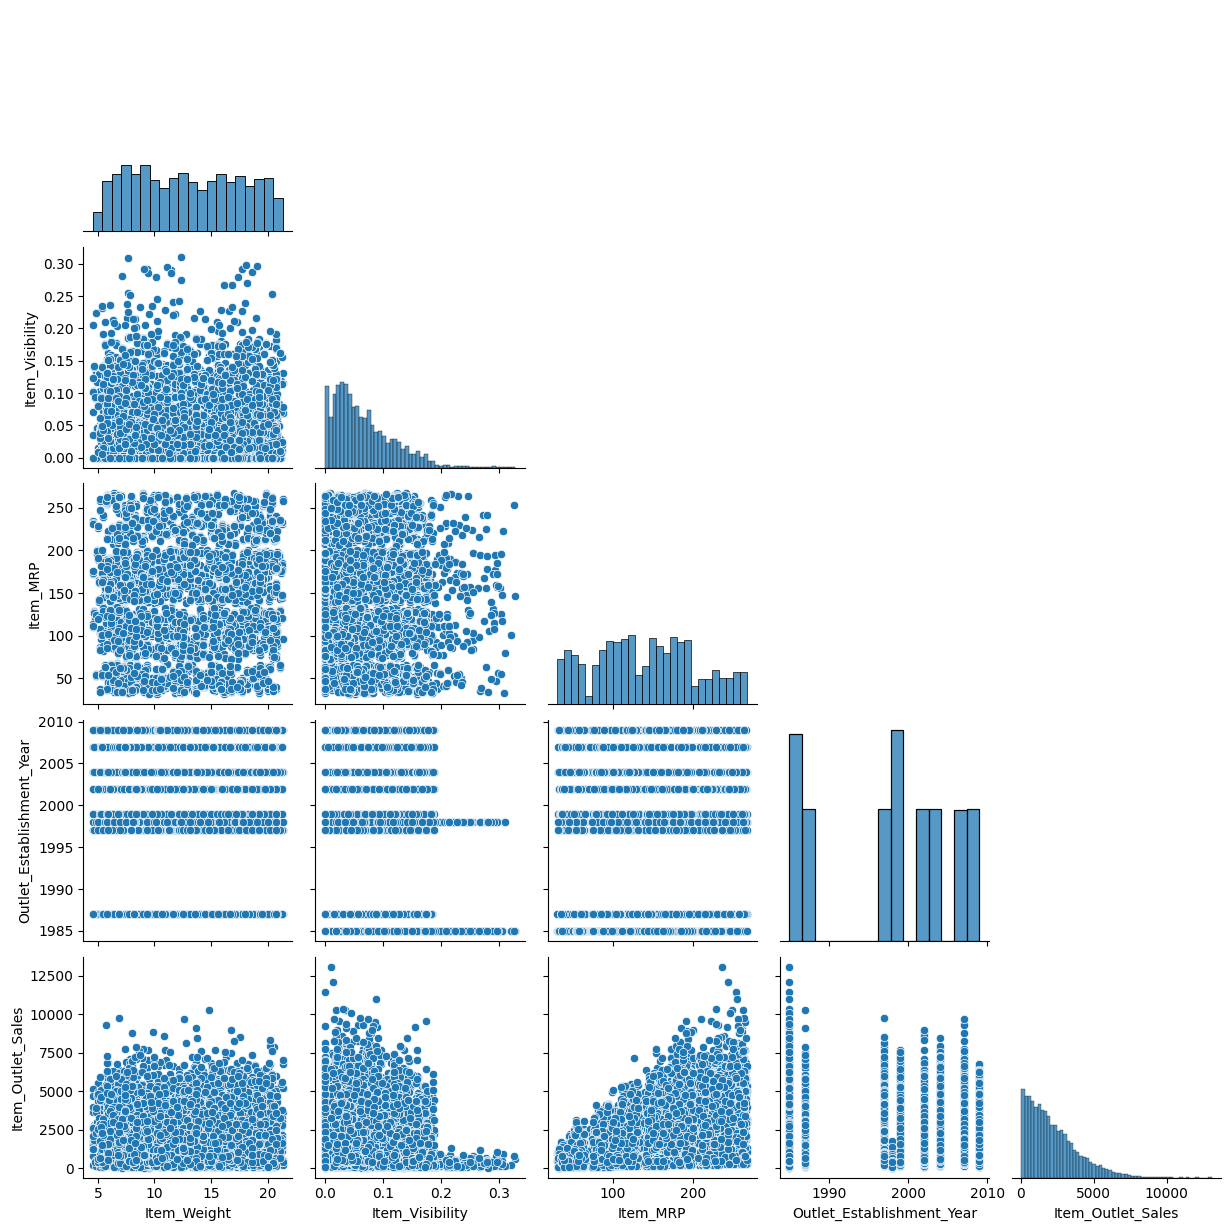

In [15]:
sns.pairplot(numerical_data,corner=True)
plt.show()

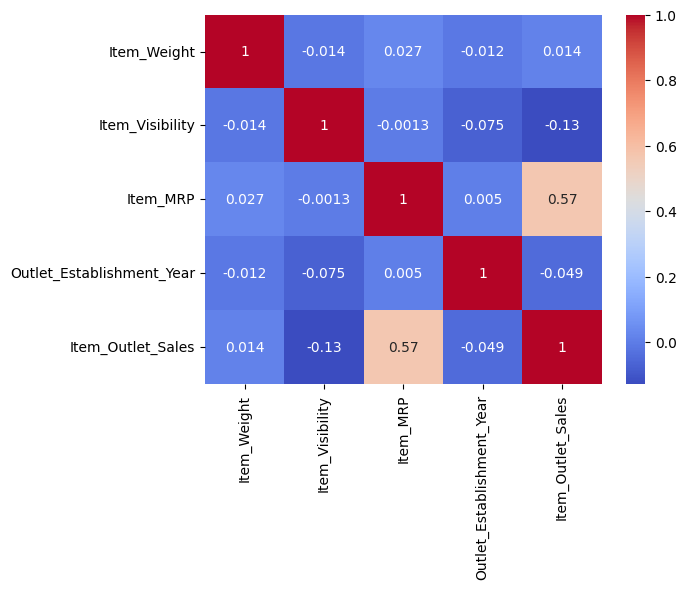

In [16]:
sns.heatmap(numerical_data.corr(),annot=True,cmap='coolwarm')
plt.show()

# **Data Cleaning**
---

**Handling Duplicate Rows**

In [17]:
duplicated_rows = df.duplicated()
print(f'duplicated_rows: {duplicated_rows.sum()}')

duplicated_rows: 0


**Handling Missing Data**

In [18]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Outlet_Size,2410,0.282764
Item_Weight,1463,0.171653
Item_Identifier,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Location_Type,0,0.000000


In [19]:
num_data_train = df.select_dtypes(exclude='object')
num_imputer_train = SimpleImputer(strategy='mean')
df[num_data_train.columns] = num_imputer_train.fit_transform(df[num_data_train.columns])

cat_data_train = df.select_dtypes(include='object')
cat_imputer_train = SimpleImputer(strategy='most_frequent')
df[cat_data_train.columns] = cat_imputer_train.fit_transform(df[cat_data_train.columns])

# **Data Preprocesing**
----

**Encoding Categorical Variables**

In [20]:
df = pd.get_dummies(df,columns=cat_data_train.columns)

**Data Splitting**

In [21]:
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,shuffle=True,test_size=.3)

**Dealing with Outliers**

In [23]:
X_train = np.log1p(X_train)
X_test = np.log1p(X_test)

**Skewness Handling**

In [24]:
y_train,_ = boxcox(y_train + 1)
y_test,_ = boxcox(y_test + 1)

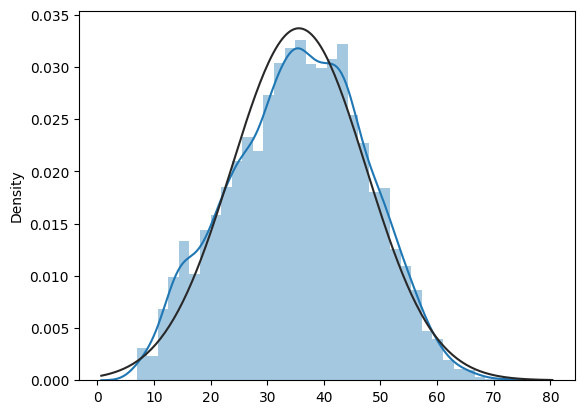

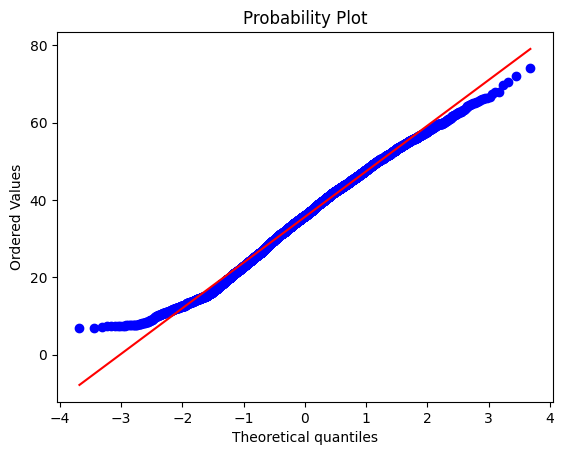

In [25]:
sns.distplot(y_train,fit = stats.norm)
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)

**Data Normalization**

In [26]:
Scalar = StandardScaler()
X_train = Scalar.fit_transform(X_train)
X_test = Scalar.transform(X_test)


# **Modelling**
---

In [27]:
regressors = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(random_state=42,alpha=.7)),
    ('Lasso Regression', Lasso(random_state=42,alpha=0.3)),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=42,max_depth=5)),
    ('Random Forest Regressor', RandomForestRegressor(random_state=42,max_depth=4)),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(random_state=42,max_depth=3)),
    ('XGBRegressor',XGB.XGBRegressor(random_state=42,max_depth=3))
]

In [28]:
for clf_name, clf in regressors:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'{clf_name}:')
    print('R2 Score: ', r2_score(y_test, y_pred))
    print("MSE: ", mean_squared_error(y_test, y_pred))
    print("MAE: ", mean_absolute_error(y_test, y_pred))
    print('------------------------------------')

Linear Regression:
R2 Score:  -1.964091712436694e+24
MSE:  2.6658545417590826e+26
MAE:  1131637668242.8855
------------------------------------
Ridge Regression:
R2 Score:  0.573266011876415
MSE:  57.92044908895222
MAE:  5.976085849587495
------------------------------------
Lasso Regression:
R2 Score:  0.6882104049649675
MSE:  42.31908839766854
MAE:  5.0662394408909375
------------------------------------
Decision Tree Regressor:
R2 Score:  0.6919445332919532
MSE:  41.812256517213434
MAE:  4.991903745318305
------------------------------------
Random Forest Regressor:
R2 Score:  0.6912214394733434
MSE:  41.91040177836661
MAE:  5.011978207144022
------------------------------------
Gradient Boosting Regressor:
R2 Score:  0.6979126284226475
MSE:  41.00220913454446
MAE:  4.944539297224459
------------------------------------
XGBRegressor:
R2 Score:  0.6950135401329693
MSE:  41.395701334275344
MAE:  4.957997028243347
------------------------------------


If you think that this accuracy is low, I want to inform you that it is one of the highest values ​​on Kaggal